# CS 105 Mini Project

**Team**: Thomas Henningson, Josh Pennington, Suhail-Anand Dhilon, Cameron Tsai <br><br>
This is our CS 105 Mini Project.

# Introduction

**Question 1**: What data do you have?

1. What is your cumulative GPA as of Winter 2022?
2. What was your GPA your very first quarter at UCR?
3. What is your gender?
4. What is your age?
5. How many STEM advanced classes did you take in high school (AP, IB, Honors, Dual-Enrollment, etc.)?
6. How many social studies/arts advanced classes did you take in high school (AP, IB, Honors, Dual-Enrollment, etc.)?
7. How often do you procrastinate?
8. Rate the importance of your education in your life on a scale of 1-10
9. Rate the enjoyment/fufillment you receive from education on a scale of 1-10
10. How many hours do you study per week on average (not including homework)?

**Question 2**: What would you like to know?

Does taking advanced courses in high school have a postive effect on student's grades, study habits, and outlook on education in college?

# Exploring the Data

First, we will remove all of the unnecessary rows for our question and clean the data

In [91]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr

data = pd.read_csv("CS105_Survey.csv")

inds = [1, 2, 3, 5, 6, 7, 9, 15, 16, 17, 18, 19, 20, 21, 23, 31, 32, 33, 43, 46, 48, 58, 59, 70, 75, 76, 77, 79]

data = data.iloc[:,inds]

data.to_csv("cleaned.csv")

Boxplots for first year GPA vs courses and current GPA vs courses (may not use)

<AxesSubplot:>

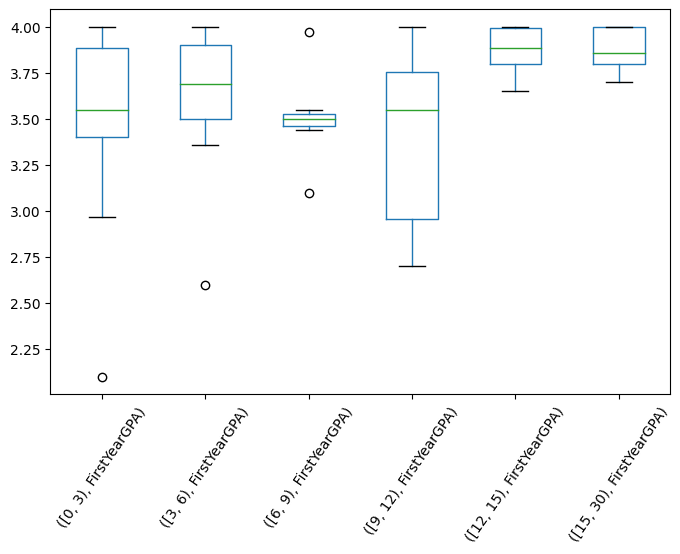

In [92]:
fyGPA_courses = data.iloc[:,[5,7,8]].dropna().replace("None", "0")

df = pd.DataFrame()
df["SumCourses"] = fyGPA_courses.iloc[:,1:3].astype(int).sum(axis=1)
df["SumCourses"] = pd.cut(df["SumCourses"],bins=[0,3,6,9,12,15,30],right=False)

df["FirstYearGPA"] = fyGPA_courses.iloc[:,0].astype(float)

df.groupby("SumCourses").boxplot(subplots=False,rot=55,figsize=(8,5),grid=False)

<AxesSubplot:>

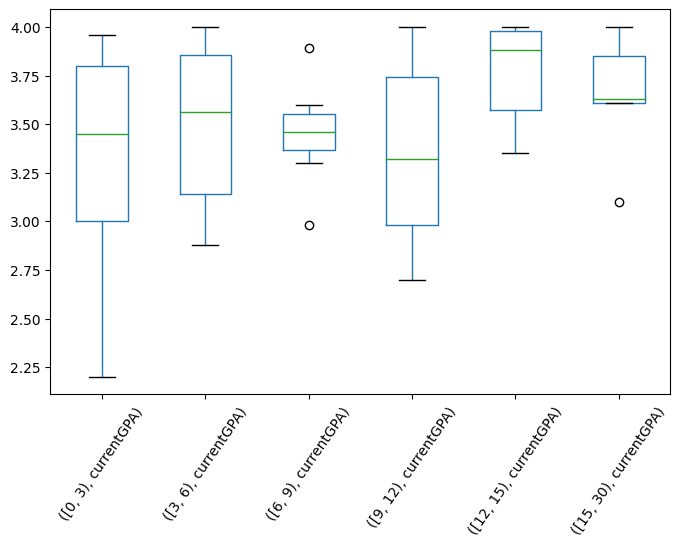

In [93]:
curGPA_courses = data.iloc[:,[3,7,8]].dropna().replace("None", "0")

df = pd.DataFrame()
df["SumCourses"] = curGPA_courses.iloc[:,1:3].astype(int).sum(axis=1)
df["SumCourses"] = pd.cut(df["SumCourses"],bins=[0,3,6,9,12,15,30],right=False)

df["currentGPA"] = curGPA_courses.iloc[:,0].astype(float)

df.groupby("SumCourses").boxplot(subplots=False,rot=55,figsize=(8,5),grid=False)

**Visualization Ideas**

Scatter plot:
	GPA vs # courses taken,
	study hours vs # courses,
	study hours to GPA,

Histogram:

Pie chart:
	Gender?

Bar chart:
	GPA distribution,
	Advanced courses distribution,

Box Plot:
	Distribution of first quarter GPA and overall GPA, for each bin of # courses?

# Hypothesis

The main question we want to answer for this mini project is whether or not taking advanced courses in high school prepares you for college or makes you more successful in college. Therefore, our main hypothesis is:

Taking advanced courses in high school leads to better academic performance in college.

In order to test this hypothesis, we will perform a correlation analysis on the total number of advanced courses taken in high school vs. the first year college GPA. After that, we will perform a chi-squared analysis on the same data. These two statistics should tell us whether there is statistical significance in the relationship between these two variables.

Lets start with the correlation analysis:

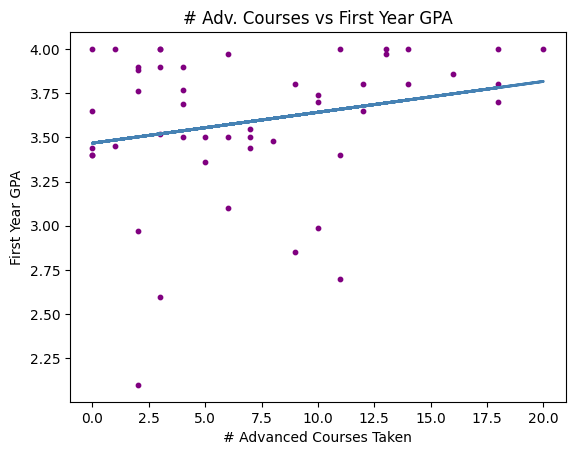

Correlation: 0.2326


In [94]:
gpa_courses = data.iloc[:,[5,7,8]].dropna().replace("None", "0") # get first year GPA and advanced courses

sumCourses = gpa_courses.iloc[:,1:3].astype(int).sum(axis=1) # sum the two types of advanced courses
yearOneGPA = gpa_courses.iloc[:,0].astype(float) # get the GPA's

a, b = np.polyfit(sumCourses, yearOneGPA, 1)

corr, extra = pearsonr(sumCourses, yearOneGPA)

plt.plot(sumCourses, a*sumCourses+b, color='steelblue', linewidth=2)
plt.scatter(sumCourses, yearOneGPA, s=10, c="purple")
plt.title("# Adv. Courses vs First Year GPA")
plt.xlabel("# Advanced Courses Taken")
plt.ylabel("First Year GPA")
plt.show()

print("Correlation:",round(corr,4))

*WRITE ANALYSIS HERE AFTER FULL DATASET GOT ON SAT/SUN*

Now, we will look at the chi-squared test. We first seperate the data into useful buckets, then generate the chi-squared table. From there, we can use Python to find the statistic and p-value.

The null hypothesis for this test it: Taking advanced courses in high school has no effect on first year college GPA.

In [95]:
sumCourses = pd.cut(sumCourses,bins=[0,3,6,9,12,15,30],labels=["0-2","3-5","6-8","9-11","12-14","15+"],right=False) # bin the sums

yearOneGPA = pd.cut(yearOneGPA,bins=[0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.1],labels=["0.00-0.49","0.50-0.99","1.00-1.49","1.50-1.99","2.00-2.49","2.50-2.99","3.00-3.49","3.50-4.00"],right=False) # bin the GPA's

table = pd.crosstab(sumCourses, yearOneGPA, rownames=["# Adv. Courses"], colnames=["First Year GPA"]) # create the chi-squared table
c, p, dof, expected = chi2_contingency(table) # perform chi-squared

# Show results
display(table)
print("Chi-Squared Statistic:", round(c, 2))
print("p-value:", round(p, 4))

First Year GPA,2.00-2.49,2.50-2.99,3.00-3.49,3.50-4.00
# Adv. Courses,,,,
0-2,1,1,4,6
3-5,0,1,1,9
6-8,0,0,3,4
9-11,0,3,1,4
12-14,0,0,0,6
15+,0,0,0,5


Chi-Squared Statistic: 20.22
p-value: 0.1638


*WRITE ANALYSIS HERE AFTER FULL DATASET GOT ON SAT/SUN*